# Binary Classification with a Software Defects Dataset
* For more information and the datasets: https://www.kaggle.com/competitions/playground-series-s3e23/overview

## Import Data

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
train_data = pd.read_csv("/content/drive/MyDrive/Data_Science/playground-series-s3e23/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Data_Science/playground-series-s3e23/test.csv")

In [111]:
train_data.columns

Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
       'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount',
       'defects'],
      dtype='object')

In [112]:
data = train_data.drop(["id", "defects"], axis=1)
target = train_data["defects"]

## Visualize Data

In [113]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0


In [114]:
data.loc[train_data["defects"] == True]

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
11,8.0,1.0,1.0,1.0,15.0,51.89,0.19,5.25,9.88,272.43,...,15.14,5,0,1,0,7.0,4.0,8.0,7.0,1.0
14,6.0,1.0,1.0,1.0,17.0,58.81,0.19,5.25,11.20,276.75,...,15.38,3,0,0,0,7.0,4.0,12.0,6.0,1.0
16,126.0,13.0,6.0,7.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0,0,0,0,0.0,0.0,0.0,0.0,25.0
18,40.0,9.0,3.0,7.0,151.0,823.92,0.04,23.33,35.54,22476.10,...,1248.67,32,0,8,2,18.0,21.0,95.0,56.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101739,79.0,12.0,7.0,8.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0,0,0,0,0.0,0.0,0.0,0.0,23.0
101741,23.0,3.0,1.0,3.0,64.0,310.91,0.09,11.20,27.21,3318.18,...,184.34,14,0,2,0,14.0,15.0,33.0,29.0,5.0
101746,48.0,9.0,4.0,7.0,129.0,713.14,0.04,26.00,27.24,18539.72,...,1029.98,35,0,11,0,26.0,22.0,77.0,52.0,15.0
101748,104.0,23.0,8.0,12.0,396.0,2467.19,0.02,45.54,56.27,116471.96,...,6470.66,85,7,7,0,29.0,54.0,249.0,147.0,45.0


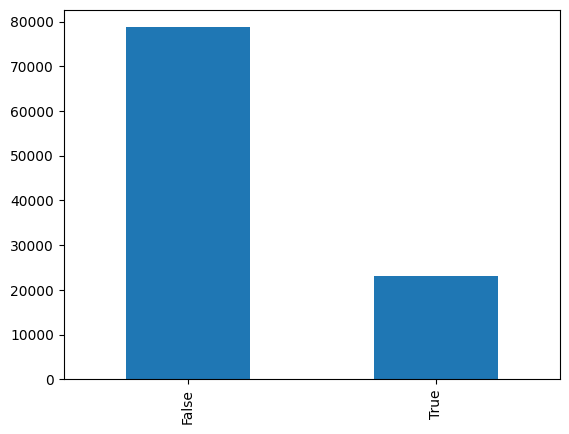

In [115]:
target.value_counts().plot(kind="bar");

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data, target, random_state=42)

X_train.shape, y_train.shape

((76322, 21), (76322,))

#### Scaling data

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_subset = scaler.fit_transform(X_train)
X_val_subset = scaler.transform(X_val)

### Baseline Models

In [118]:
AUC_Scores = {}

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score

clf = RandomForestClassifier()
clf.fit(X_train_subset, y_train)

forest_preds = clf.predict(X_val_subset)

score_random_forest = roc_auc_score(y_val, forest_preds)
AUC_Scores["Random_Forest"] = {"Normal_Data": score_random_forest}

f1 = f1_score(y_val, forest_preds)

print(f"AUC: {score_random_forest}")
print(f"F1_Sccore: {f1}")

AUC: 0.6585129327734782
F1_Sccore: 0.4758380496299521


In [120]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(X_train_subset, y_train)

lgb_preds = lgb.predict(X_val_subset)
score_lgb = roc_auc_score(y_val, lgb_preds)

AUC_Scores["LGBMClassifier"] = {"Normal_Data": score_lgb}

f1 = f1_score(y_val, lgb_preds)

print(f"AUC: {score_lgb}")
print(f"F1_Sccore: {f1}")

[LightGBM] [Info] Number of positive: 17337, number of negative: 58985
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3553
[LightGBM] [Info] Number of data points in the train set: 76322, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227156 -> initscore=-1.224440
[LightGBM] [Info] Start training from score -1.224440
AUC: 0.6663426513726346
F1_Sccore: 0.4907006920415224


In [121]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_subset, y_train)

xgb_preds = xgb.predict(X_val_subset)

score_xgb = roc_auc_score(y_val, xgb_preds)
AUC_Scores["XGBClassifier"] = {"Normal_Data": score_xgb}

f1 = f1_score(y_val, xgb_preds)

print(f"AUC: {score_xgb}")
print(f"F1_Sccore: {f1}")

AUC: 0.6636069001316344
F1_Sccore: 0.48522617384764155


#### Tuning models

In [122]:
!pip install scikit-optimize

In [123]:
from skopt import gp_minimize

def train_lgb(params):
  """
  Trains a model with a list of tuples.
  """

  learning_rate = params[0]
  num_leaves = params[1]
  min_child_samples = params[2]
  subsample = params[3]
  colsample_bytree = params[4]

  lgb = LGBMClassifier(learning_rate=learning_rate,
                       num_leaves=num_leaves,
                       min_child_samples=min_child_samples,
                       subsample=subsample,
                       colsample_bytree=colsample_bytree,
                       random_state=42,
                       subsample_freq=1,
                       n_estimators=100,
                       verbose=-1)

  lgb.fit(X_train_subset, y_train)

  preds = lgb.predict(X_val_subset)

  return -roc_auc_score(y_val, preds)

grid = [(1e-3, 1e-1), # learning_rate
        (2, 128), # num_leaves
        (1, 100), # nim_child_samples
        (0.05, 1.0), # subsample
        (0.1, 1)] # colsample_bytree

results_lgb = gp_minimize(train_lgb, grid, random_state=42, verbose=0, n_calls=30, n_random_starts=10)

In [124]:
results_lgb.func_vals

array([-0.66579931, -0.5995997 , -0.51017477, -0.65843146, -0.65552358,
       -0.66452874, -0.66508965, -0.66236415, -0.66236366, -0.66368154,
       -0.65059982, -0.66426731, -0.66354301, -0.65059982, -0.65802764,
       -0.5       , -0.66110578, -0.58953415, -0.65990446, -0.66355229,
       -0.66156521, -0.66590905, -0.64584971, -0.66753371, -0.66759858,
       -0.66206614, -0.64242139, -0.66183446, -0.65220352, -0.66684112])

In [125]:
print(f"Best params: {results_lgb.x}\nAUC score: {np.min(results_lgb.func_vals)}")

Best params: [0.08969282622710473, 4, 56, 0.9822582052729546, 1.0]
AUC score: -0.6675985848550989


In [126]:
def train_xgb(params):

  eta = params[0]
  max_depth = params[1]
  min_child_weight = params[2]
  gamma = params[3]

  xgb = XGBClassifier(eta=eta,
                      max_depth=max_depth,
                      min_child_weight=min_child_weight,
                      gamma=gamma)

  xgb.fit(X_train_subset, y_train)

  preds = xgb.predict(X_val_subset)

  return -roc_auc_score(y_val, preds)

grid = [(1e-3, 1e-1), # Eta
        (1, 50), # Max depth
        (1, 50), # Min_child_weight
        (1, 50)] # Gamma

results = gp_minimize(train_xgb, grid, random_state=42, verbose=0, n_calls=30, n_random_starts=10)

In [127]:
results.func_vals

array([-0.66508428, -0.66606708, -0.64708421, -0.66719814, -0.6640254 ,
       -0.66690599, -0.60184087, -0.66626413, -0.5       , -0.5       ,
       -0.66076485, -0.66134084, -0.66367666, -0.66041755, -0.66329622,
       -0.66553496, -0.66656213, -0.66475799, -0.65782865, -0.66689185,
       -0.66424488, -0.66712255, -0.66645483, -0.66523353, -0.66556325,
       -0.6649204 , -0.66530133, -0.66648361, -0.66646897, -0.65966744])

In [128]:
print(f"Best params: {results.x}\nAUC score: {np.min(results.func_vals)}")

Best params: [0.0939167181925593, 1, 50, 31]
AUC score: -0.6671981449269694


#### Undersampling

In [129]:
from imblearn.under_sampling import RandomUnderSampler

us = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = us.fit_resample(X_train, y_train)

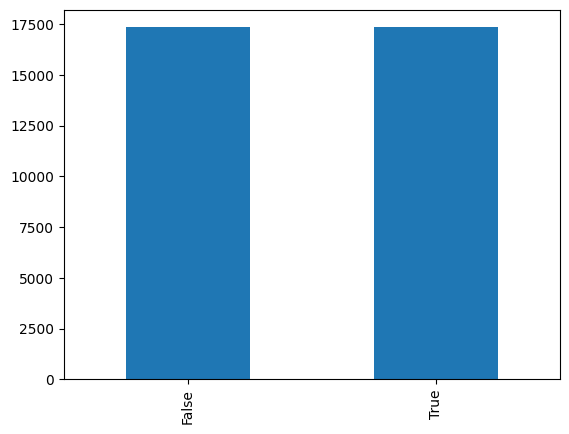

In [130]:
y_train_under.value_counts().plot(kind="bar");

### Training best model with undersampling

In [131]:
lgb = LGBMClassifier(learning_rate=0.897,
                       num_leaves=4,
                       min_child_samples=56,
                       subsample=0.98,
                       colsample_bytree=1,
                       random_state=42,
                       subsample_freq=1,
                       n_estimators=100,
                       verbose=-1)

lgb.fit(X_train_under, y_train_under)

preds = lgb.predict(X_val_subset)

score = roc_auc_score(y_val, preds)
AUC_Scores["LGBMClassifier"].update({"Undersampled_Data": score})

f1 = f1_score(y_val, lgb_preds)

print(f"AUC: {score}")
print(f"F1_Sccore: {f1}")

AUC: 0.5123905779661557
F1_Sccore: 0.4907006920415224


In [132]:
xgb = XGBClassifier(eta=0.09,
                    max_depth=1,
                    min_child_weight=50,
                    gamma=31)

xgb.fit(X_train_under, y_train_under)

preds = xgb.predict(X_val_subset)

score = roc_auc_score(y_val, preds)
AUC_Scores["XGBClassifier"].update({"Undersampled_Data": score})

f1 = f1_score(y_val, preds)

print(f"AUC: {score}")
print(f"F1_Sccore: {f1}")

AUC: 0.5003238602924562
F1_Sccore: 0.0013956734124214933


## Feature Selection

In [133]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif

k_vs_score = []

for i in range(2, len(data.columns)+1):
  k = i
  # Create Filter
  selector = SelectKBest(score_func=f_classif, k=k)

  # Fit and transform
  X_train_subset = selector.fit_transform(X_train, y_train)
  X_val_subset = selector.transform(X_val)

  # Create model
  clf = XGBClassifier(n_estimators=100, n_jobs=-1, random_state=42)
  clf.fit(X_train_subset, y_train)

  # Get predictions
  preds = clf.predict(X_val_subset)

  # Get score
  score = roc_auc_score(y_val, preds)
  k_vs_score.append(score)
  print(f"K = {k} // AUC = {score}")

K = 2 // AUC = 0.6660178079273262
K = 3 // AUC = 0.6640068484833379
K = 4 // AUC = 0.660021040533904
K = 5 // AUC = 0.6592513779950091
K = 6 // AUC = 0.6580315333080052
K = 7 // AUC = 0.6597571569940457
K = 8 // AUC = 0.6559079054328834
K = 9 // AUC = 0.6594142802225481
K = 10 // AUC = 0.6604931664765284
K = 11 // AUC = 0.6585353681444197
K = 12 // AUC = 0.6619822356148307
K = 13 // AUC = 0.6627884785256122
K = 14 // AUC = 0.6615998511559725
K = 15 // AUC = 0.6626465369397364
K = 16 // AUC = 0.6624494900793588
K = 17 // AUC = 0.6630581945533367
K = 18 // AUC = 0.6630386864978693
K = 19 // AUC = 0.6637849305129707
K = 20 // AUC = 0.6618076241253947
K = 21 // AUC = 0.6636069001316344


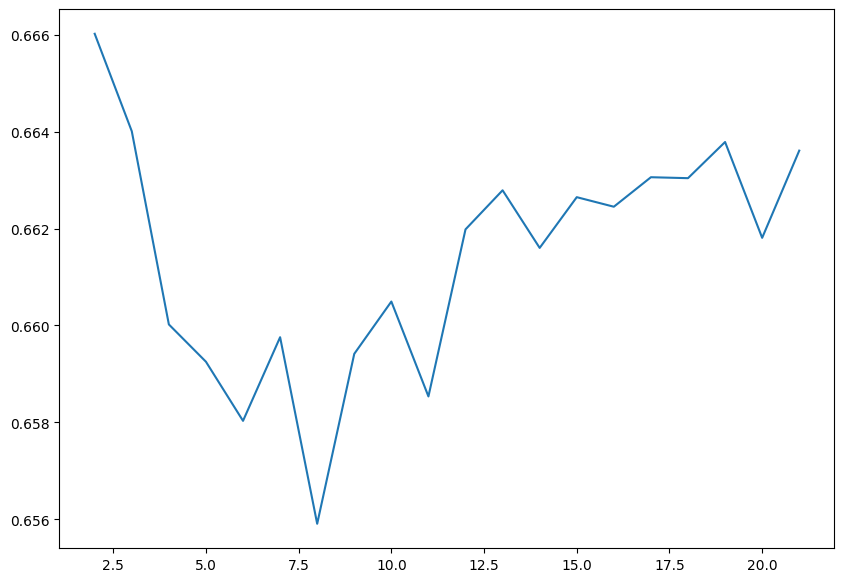

In [134]:
pd.Series(k_vs_score, index=range(2, len(data.columns)+1)).plot(figsize=(10, 7));

In [135]:
# Create Filter
selector = SelectKBest(score_func=f_classif, k=16)
selector.fit(X_train, y_train)

# Get columns
features_list = selector.get_support()
X_val.columns[features_list]

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'b', 'lOCode',
       'lOComment', 'lOBlank', 'uniq_Opnd', 'total_Op', 'total_Opnd',
       'branchCount'],
      dtype='object')

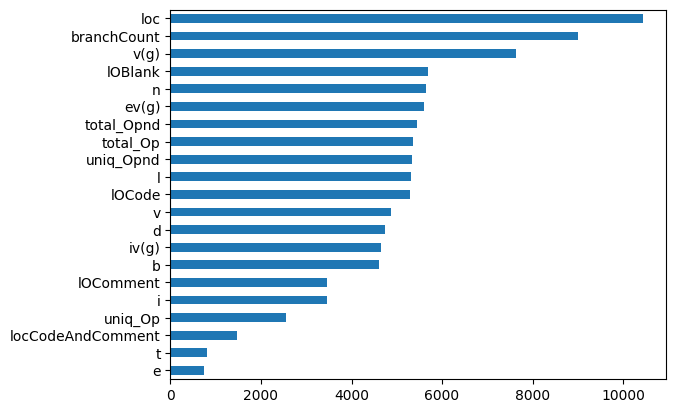

In [136]:
pd.Series(selector.scores_, index=X_train.columns).sort_values().plot(kind="barh");

In [137]:
X_train_features = X_train.loc[:, X_train.columns[features_list]]
X_train_features

X_val_features = X_val.loc[:, X_val.columns[features_list]]
X_val_features

,loc,v(g),ev(g),iv(g),n,v,l,d,b,lOCode,lOComment,lOBlank,uniq_Opnd,total_Op,total_Opnd,branchCount
35956,21.0,3.0,1.0,3.0,71.0,355.00,0.10,10.50,0.12,17,0,2,18.0,43.0,28.0,5.0
60927,29.0,4.0,1.0,2.0,67.0,315.78,0.08,12.79,0.11,17,4,4,17.0,42.0,29.0,7.0
79918,42.0,11.0,9.0,5.0,165.0,872.80,0.05,21.72,0.29,33,1,4,29.0,96.0,69.0,21.0
50078,8.0,1.0,1.0,1.0,7.0,19.65,0.33,3.00,0.01,3,0,2,1.0,6.0,1.0,1.0
44080,5.0,1.0,1.0,1.0,14.0,46.51,0.33,3.00,0.01,3,0,0,5.0,8.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,16.0,2.0,1.0,1.0,41.0,180.09,0.14,7.13,0.06,9,2,4,12.0,25.0,16.0,3.0
56352,64.0,7.0,5.0,6.0,0.0,0.00,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,13.0
11754,19.0,4.0,1.0,2.0,52.0,238.42,0.08,13.00,0.08,14,0,3,11.0,31.0,21.0,7.0
37789,44.0,13.0,11.0,3.0,137.0,596.54,0.04,26.92,0.20,36,9,3,12.0,115.0,42.0,25.0


In [138]:
scaler = StandardScaler()
scaler.fit(X_train_features)

StandardScaler()

In [139]:
X_train_feature_norm = scaler.transform(X_train_features)

X_val_feature_norm = scaler.transform(X_val_features)

X_train_feature_norm.shape, X_val_feature_norm.shape

((76322, 16), (25441, 16))

### Training model with feature selection

In [140]:
lgb.fit(X_train_feature_norm, y_train)

# Get predictions
preds = lgb.predict(X_val_feature_norm)

# Get score
score = roc_auc_score(y_val, preds)
score

AUC_Scores["LGBMClassifier"].update({"Feature_Selection_Data": score})

print(f"AUC: {score_xgb}")

AUC: 0.6636069001316344


In [141]:
xgb.fit(X_train_feature_norm, y_train)

# Get predictions
preds = xgb.predict(X_val_feature_norm)

# Get score
score = roc_auc_score(y_val, preds)
score

AUC_Scores["XGBClassifier"].update({"Feature_Selection_Data": score})

print(f"AUC: {score}")

AUC: 0.6638844370960116


### Training model with feature selection + undersampling

In [142]:
X_train_feat_norm_under, y_train_under = us.fit_resample(X_train_feature_norm, y_train)
X_train_feat_norm_under

array([[-0.59929657, -0.56525071, -0.39630263, ..., -0.4855283 ,
        -0.47687308, -0.61248798],
       [-0.35798539, -0.31404207, -0.39630263, ..., -0.24014057,
        -0.24649108, -0.33559343],
       [ 0.75575851, -0.43964639, -0.39630263, ...,  1.07513761,
         1.4525762 , -0.4740407 ],
       ...,
       [-0.20948621, -0.43964639, -0.39630263, ..., -0.22050956,
        -0.16009783, -0.4740407 ],
       [ 0.18032416, -0.06283343, -0.39630263, ...,  0.29971241,
         0.30066618, -0.05869887],
       [ 0.25457375, -0.43964639, -0.39630263, ...,  0.947536  ,
         0.96301444, -0.4740407 ]])

In [143]:
lgb.fit(X_train_feat_norm_under, y_train_under)

# Get predictions
preds = lgb.predict(X_val_feature_norm)

# Get score
score = roc_auc_score(y_val, preds)
score

AUC_Scores["LGBMClassifier"].update({"Selection_Undersampled_Data": score})

print(f"AUC: {score}")

AUC: 0.7153114799180225


In [144]:
xgb.fit(X_train_feat_norm_under, y_train_under)

# Get predictions
preds = xgb.predict(X_val_feature_norm)

# Get score
score = roc_auc_score(y_val, preds)
score

AUC_Scores["XGBClassifier"].update({"Selection_Undersampled_Data": score})

print(f"AUC: {score_xgb}")

AUC: 0.6636069001316344


## Tensorflow Experiments

In [145]:
import tensorflow as tf
from tensorflow.keras import layers

In [146]:
# Tensorflow callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                              patience=3)

#### Normal Data


In [147]:
cols = len(X_train.columns)

inputs = layers.Input(shape=(cols, ), name="inputs")
x = layers.Dense(64, activation="tanh")(inputs)
outputs = layers.Dense(1, activation="sigmoid")(x)


model_tf_normal = tf.keras.Model(inputs, outputs, name="normal_data")

model_tf_normal.compile(loss="BinaryCrossentropy",
                        optimizer="Adam",
                        metrics=["acc"])

history_tf_normal = model_tf_normal.fit(X_train, y_train,
                                        epochs=100,
                                        validation_data=(X_val, y_val),
                                        callbacks=[early_stop],
                                        verbose=0)

tf_pred = model_tf_normal.predict(X_val)

score = roc_auc_score(y_val, tf_pred)
AUC_Scores["TensorFlow"] = {"Normal_Data": score}

print(f"Accuracy: {history_tf_normal.history['acc']}")

796/796 [==============================] - 1s 792us/step
Accuracy: [0.7797227501869202, 0.7861691117286682, 0.7873745560646057, 0.7868373394012451, 0.7870208024978638, 0.7870076894760132, 0.7873745560646057, 0.788068950176239, 0.7875972986221313]


#### Feature Selection

In [148]:
inputs = layers.Input(shape=(len(X_train_features.columns),), name="inputs")
x = layers.Dense(64, activation="tanh")(inputs)
outputs = layers.Dense(1, activation="sigmoid")(x)


model_tf_feature = tf.keras.Model(inputs, outputs, name="normal_data")

model_tf_feature.compile(loss="BinaryCrossentropy",
                        optimizer="Adam",
                        metrics=["acc"])

history_tf_feature = model_tf_feature.fit(X_train_features, y_train,
                                        epochs=100,
                                        validation_data=(X_val_features, y_val),
                                        callbacks=[early_stop],
                                        verbose=0)

tf_pred = model_tf_feature.predict(X_val_features)

score = roc_auc_score(y_val, tf_pred)
AUC_Scores["TensorFlow"].update({"Feature_Selection_Data": score})

print(f"Accuracy: {history_tf_feature.history['acc']}")

796/796 [==============================] - 1s 763us/step
Accuracy: [0.7951049208641052, 0.7957469820976257, 0.7971489429473877, 0.8004507422447205, 0.8040669560432434, 0.8005686402320862, 0.7977647185325623]


#### Undersampled data

In [149]:
inputs = layers.Input(shape=(len(X_train_under.columns),), name="inputs")
x = layers.Dense(64, activation="tanh")(inputs)
outputs = layers.Dense(1, activation="sigmoid")(x)


model_tf_under = tf.keras.Model(inputs, outputs, name="normal_data")

model_tf_under.compile(loss="BinaryCrossentropy",
                        optimizer="Adam",
                        metrics=["acc"])

history_tf_under = model_tf_under.fit(X_train_under, y_train_under,
                                        epochs=100,
                                        validation_data=(X_val, y_val),
                                        callbacks=[early_stop],
                                        verbose=0)

tf_pred = model_tf_under.predict(X_val)

print(f"Accuracy: {history_tf_under.history['acc']}")

796/796 [==============================] - 1s 784us/step
Accuracy: [0.6572648286819458, 0.5631885528564453, 0.5978254675865173, 0.6660898923873901, 0.5556036233901978, 0.5959796905517578, 0.6471419334411621, 0.5609967112541199, 0.6773951649665833]


#### Feature Selection + Undersampled

In [150]:
inputs = layers.Input(shape=(X_train_feat_norm_under.shape[1], ), name="inputs")
x = layers.Dense(64, activation="tanh")(inputs)
outputs = layers.Dense(1, activation="sigmoid")(x)


model_tf_selection_undersampled = tf.keras.Model(inputs, outputs, name="normal_data")

model_tf_selection_undersampled.compile(loss="BinaryCrossentropy",
                                        optimizer="Adam",
                                        metrics=["acc"])

history_tf_selection_undersampled = model_tf_selection_undersampled.fit(X_train_feat_norm_under, y_train_under,
                                                                        epochs=100,
                                                                        validation_data=(X_val_feature_norm, y_val),
                                                                        callbacks=[early_stop],
                                                                        verbose=0)

tf_pred = model_tf_selection_undersampled.predict(X_val_feature_norm)

score = roc_auc_score(y_val, tf_pred)
AUC_Scores["TensorFlow"].update({"Selection_Undersampled_Data": score})

print(f"Accuracy: {history_tf_selection_undersampled.history['acc']}")

796/796 [==============================] - 1s 779us/step
Accuracy: [0.7206264138221741, 0.7231354713439941, 0.7248659133911133, 0.7235969305038452]


## Comparing results




In [151]:
pd.DataFrame(AUC_Scores)

,Random_Forest,LGBMClassifier,XGBClassifier,TensorFlow
Normal_Data,0.658513,0.666343,0.663607,0.714141
Undersampled_Data,NaN,0.512391,0.500324,NaN
Feature_Selection_Data,NaN,0.660437,0.663884,0.769760
Selection_Undersampled_Data,NaN,0.715311,0.719763,0.786227


## Evaluating best model

In [152]:
# Function to return ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

def get_roc(y_true, y_pred):
  """
  Returns a dictionary of true positives, false positives and thresholds
  """
  # Cacculate the ROC curve
  fpr, tpr, threshold = roc_curve(y_true, y_pred)

  # Calculate area unde the curve
  auc = roc_auc_score(y_true, y_pred)

  # Dictionary
  roc = {"fpr": fpr,
         "tpr": tpr,
         "threshold": threshold,
         "auc": auc}

  return roc

In [153]:
# Plot ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
  """
  Plot the roc curve.
  """
  plt.plot(fpr, tpr)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")

In [154]:
# Plot loss and val_loss curves
def plot_loss(history):
  """
  Plot the graphs of loss and val_loss, auc and val_auc
  """
  # Training metrics
  loss = history.history["loss"]
  auc = history.history["auc"]

  # Validation metrics
  val_loss = history.history["val_loss"]
  val_auc = history.history["val_auc"]

  epochs = range(len(history.history["loss"]))

  # Plot curves
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="validation_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Create new figure
  plt.figure()

  # Plot AUC curve
  plt.plot(epochs, auc, label="training auc")
  plt.plot(epochs, val_auc, label="validation auc")
  plt.title("auc")
  plt.xlabel("epochs")
  plt.legend()


In [155]:
roc_baseline = get_roc(y_val, tf_pred)
roc_baseline

{'fpr': array([0.       , 0.       , 0.       , ..., 0.9997971, 0.9997971,
        1.       ]),
 'tpr': array([0.00000000e+00, 1.74611489e-04, 6.98445958e-04, ...,
        9.99825389e-01, 1.00000000e+00, 1.00000000e+00]),
 'threshold': array([1.9954281 , 0.995428  , 0.9753514 , ..., 0.17788504, 0.1768252 ,
        0.17386673], dtype=float32),
 'auc': 0.7862269594364775}

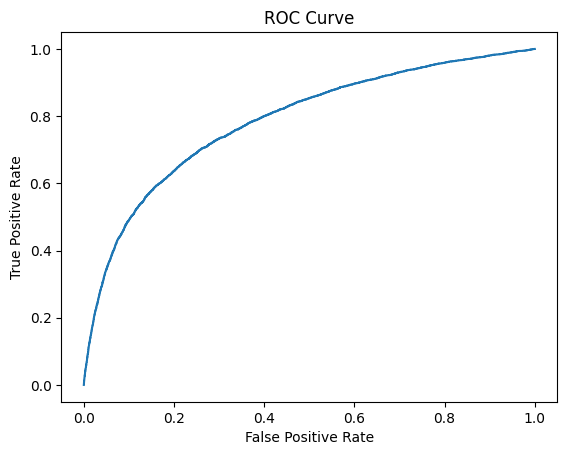

In [156]:
plot_roc_curve(roc_baseline["fpr"],
               roc_baseline["tpr"])

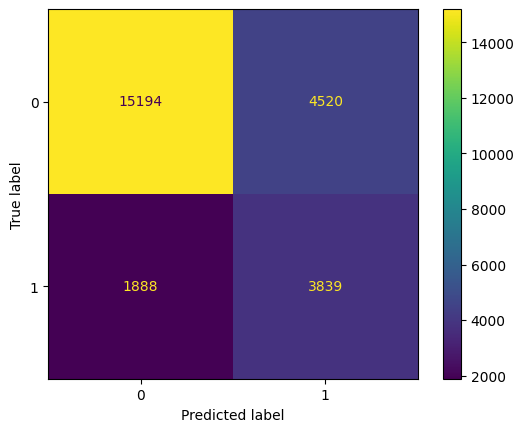

In [157]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, np.round(tf_pred))
ConfusionMatrixDisplay(cm).plot();

### Trying improve model
* Best Score -> 0.786649

In [158]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(0.1)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [159]:
inputs = layers.Input(shape=(len(X_train_features.columns), ), name="inputs")
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dense(8, activation="tanh")(x)
x = layers.Dense(8, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


model_1 = tf.keras.Model(inputs, outputs, name="normal_data")

model_1.compile(loss="BinaryCrossentropy",
                        optimizer="Adam",
                        metrics=["acc"])

history_1 = model_1.fit(X_train_features, y_train,
                        epochs=100,
                        validation_data=(X_val_features, y_val),
                        callbacks=[early_stop],
                        verbose=0)


tf_pred = model_1.predict(X_val_features)

score = roc_auc_score(y_val, tf_pred)

AUC_Scores["TensorFlow"].update({"Selection_Undersampled_Data": score})

best_lr = round(model_1.optimizer.lr.numpy(), 5)

f1 = f1_score(y_val, tf.argmax(tf_pred, axis=1))

print(f"F1_Score: {f1_score}")
print(f"AUC Score: {score}")
print(f"Tf AUC Score: {history_1.history['val_acc']}")
print(f"Best Learning Rate: {best_lr}")

796/796 [==============================] - 1s 793us/step
F1_Score: <function f1_score at 0x7d780ec4acb0>
AUC Score: 0.5573281033853071
Tf AUC Score: [0.7748908996582031, 0.7862505316734314, 0.7855036854743958, 0.7874690294265747, 0.7897881269454956, 0.7845996618270874, 0.7876262664794922, 0.7884123921394348]
Best Learning Rate: 0.0010000000474974513


### Prepraring Test Data

In [160]:
X_test = test_data.drop("id", axis=1)
X_test = X_test.loc[:, X_test.columns[features_list]]
X_test = scaler.transform(X_test)

X_test

array([[-0.07954942, -0.06283343, -0.39630263, ...,  0.2898969 ,
         0.25746956, -0.05869887],
       [-0.19092381,  0.31397953,  1.10348319, ...,  0.12303325,
         0.14227855,  0.35664296],
       [ 1.72100322,  0.69079249,  0.88922807, ...,  2.70451209,
         2.95005922,  0.77198479],
       ...,
       [-0.246611  , -0.43964639, -0.39630263, ..., -0.21069405,
        -0.30408658, -0.4740407 ],
       [-0.35798539, -0.43964639, -0.39630263, ..., -0.27940261,
        -0.24649108, -0.4740407 ],
       [ 1.18269367,  1.19320977,  1.53199342, ..., -0.56405237,
        -0.56326633,  1.32577389]])

### Creating Predictions
* Submission: ID - Pred_probs

* Observation: Using the model trained on undersampled data gave a really low score on Kaggle, so I used the normal.

In [161]:
pred_probs = model_1.predict(X_test)
defects = tf.squeeze(pred_probs)
defects

2121/2121 [==============================] - 2s 794us/step


<tf.Tensor: shape=(67842,), dtype=float32, numpy=
array([0.20708384, 0.20708688, 0.20700972, ..., 0.21446292, 0.22127774,
       0.23945114], dtype=float32)>

In [162]:
id = test_data["id"]
id

0        101763
1        101764
2        101765
3        101766
4        101767
          ...  
67837    169600
67838    169601
67839    169602
67840    169603
67841    169604
Name: id, Length: 67842, dtype: int64

In [163]:
submission = {"id":id, "defects":defects}

sub_data = pd.DataFrame(submission)
sub_data

,id,defects
0,101763,0.207084
1,101764,0.207087
2,101765,0.207010
3,101766,0.207023
4,101767,0.215254
...,...,...
67837,169600,0.207405
67838,169601,0.218567
67839,169602,0.214463
67840,169603,0.221278


In [164]:
sub_data.to_csv('submission_2_file.csv', index=False)